<a href="https://colab.research.google.com/github/ganip007/MLEssentials2/blob/main/Copy_of_logit_2_college_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression With College Admision data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [ ]:
import os
import urllib.request

data_location = "admission-data.csv"
data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/college-admissions/admission-data.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: admission-data.csv


In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

data = pd.read_csv(data_location)
data.sample(10)

,admit,gre,gpa,rank
1,1,660,3.67,3
88,1,700,3.28,1
61,0,560,3.32,4
8,0,540,3.39,3
13,1,700,3.08,2
85,0,520,2.98,2
18,1,800,3.75,2
46,1,580,3.46,2
29,0,520,3.29,1
27,1,520,3.74,4


## Exploratory Data Analysis (EDA)

In [ ]:
## TODO : 'describe' the dataset
data.describe()

,admit,gre,gpa,rank
count,100.00,100.00,100.00,100.00
mean,0.43,600.00,3.39,2.52
std,0.50,124.46,0.40,1.02
min,0.00,300.00,2.42,1.00
25%,0.00,520.00,3.13,2.00
50%,0.00,600.00,3.35,2.00
75%,1.00,700.00,3.67,3.00
max,1.00,800.00,4.00,4.00


In [ ]:
# TODO : how are our labels distributed
## Hint : 'value_counts'

data['admit'].value_counts()

0    57
1    43
Name: admit, dtype: int64

In [ ]:
data['admit'].value_counts(normalize=True)

## Shape Data

In [ ]:
## extract x and y
## Hint : input columns : gre, gpa, rank
#  hint: y colunm is : 'admit'

x = data[['gre', 'gpa', 'rank']]
y = data['admit']

print (x)
print (y)

    gre  gpa  rank
0   380 3.61     3
1   660 3.67     3
2   800 4.00     1
3   640 3.19     4
4   520 2.93     4
..  ...  ...   ...
95  660 3.33     2
96  640 3.52     4
97  480 3.57     2
98  700 2.88     2
99  400 3.31     3

[100 rows x 3 columns]
0     0
1     1
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: admit, Length: 100, dtype: int64


In [ ]:
## Todo : print the 'shape' of X and y
## hint : shape
print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (100, 3)
y :  (100,)


## Split train/test

In [ ]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2, random_state=123)


print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (80, 3)
x_test : (20, 3)
y_train : (80,)
y_test : (20,)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# TODO : Fit the model
## Hint : first param : x_train,  
##        second_param : y_train

model = lr.fit(x_train, y_train)


In [ ]:
print('coef : ', model.coef_)
print('intercept' , model.intercept_)

coef :  [[ 0.01330791  1.5104773  -0.13075747]]
intercept [-13.27218281]


## Model Evaluation

In [ ]:
## TODO : predict on x_test
## hint : 'x_test'

y_pred = model.predict (x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
train_accuracy = model.score(x_train,y_train)
print ("Train accuracy: ", train_accuracy)

Train accuracy:  0.8125


In [ ]:
## TODO : calculate test_accuracy
## Hint : x_test,  y_test

test_accuracy = model.score(x_test, y_test)

print ("Test accuracy: ", test_accuracy)

Test accuracy:  0.7


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
# print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,0,1
0,8,3
1,3,6


[]

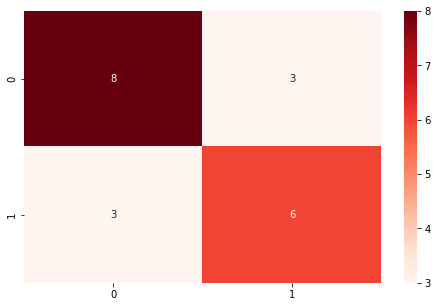

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='d').plot()